# Model Training for Test-Time Scaling

This notebook covers:
1. Loading preprocessed data
2. Model definition
3. Training baseline model
4. Initial evaluation

In [1]:
import sys
sys.path.append('..')

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

## 1. Load Preprocessed Data

In [2]:
# Load the preprocessed data
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (800, 20)
Test data shape: (200, 20)


## 2. Model Definition

In [3]:
# Initialize the baseline model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

## 3. Model Training

In [4]:
# Train the model
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, '../data/processed/baseline_model.pkl')

['../data/processed/baseline_model.pkl']

## 4. Initial Evaluation

In [5]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test accuracy: 0.8700

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       112
           1       0.84      0.88      0.86        88

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



## 5. Feature Importance Analysis

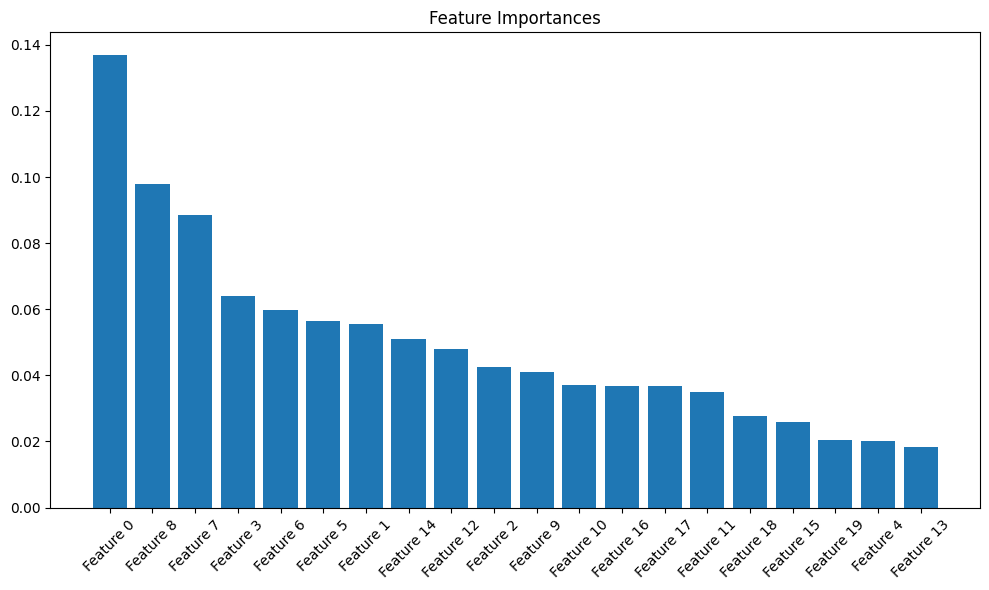

In [6]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [f'Feature {i}' for i in indices], rotation=45)
plt.tight_layout()
plt.show()